## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
#import sys
import random as rd

#Recupérer l'index du max d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

#creer 10000 abscisses et ordonnes avec moyenne -2 et ecart type 0,75
abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
#les 10000 labels reçoit 0 ou 1
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

#faire une seule liste: liste intermediaire .ravel
abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


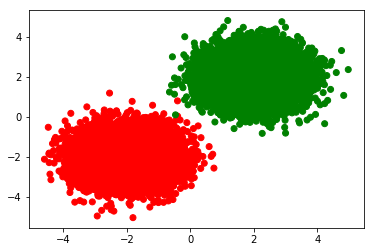

In [3]:
#0 correspond à rouge et 1 correspond a 1(labels)
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
#voir la liste dans un dataframe
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-2.8416771394087843, -1.8003996345911812, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                   ord couleur
0      -2.8416771394087843   -1.8003996345911812     red
1       -2.369871092098934   -2.2218758909652228     red
2      -2.9078124820805593  -0.03878894356717799     red
3        -2.35176756065247   -2.2957637620150324     red
4      -2.2082148922813802   -3.2999893213656355     red
5      -1.4679982472952955   -1.0604511809509325     red
6      -1.5149783875873188    -1.891249487877594     red
7      -1.8754954451351964   -1.0038359324168646     red
8       -2.817663903772516   -2.1875849722230485     red
9      -1.6192396846099615    -2.130984432069909     red
10     -3.5697890581809375   -0.6043127485925059     red
11     -1.8361101265089352   -2.4646368354586334     red
12     -1.0950427758185461   -1.2325489722364358     red
13     -2.3762886423115495   -1.2102134918437817     red
14      -2.175876063790506    -2.691250698176704     red
15      -2.259729689170708     -2.89916180809836     red
16      -3.237330219252952    -2.457831902425502     red
17     -1.4543234668501182   -1.4552661228745316     red
18     -2.0423971634733644    -2.975853838022706     red
19     -1.7936359436116878   -1.5451079712261302     red
20      -1.309287837643827   -1.8012574158302141     red
21     -2.6868377738524893     -1.85624450756089     red
22     -1.8423695319970137   -1.3578448054524295     red
23      -2.551706065127731   -2.3350335150088286     red
24     -1.6070019009632075   -2.2561536608018313     red
25     -2.5231721809870127    -3.383224143191679     red
26      -2.213508541037517   -2.6713807614113905     red
27       -1.95175715577673    -2.191573387761794     red
28     -2.1208135661938474    -2.030389178662716     red
29     -2.0127281081579462    -3.551978920889667     red
...                    ...                   ...     ...
19970   1.7522066055667285    1.0686387872376466   green
19971   1.2161394875760436    2.2481175451257656   green
19972    0.915449333088941     1.974866803944126   green
19973   0.5906518328498327    3.3115211795700095   green
19974   1.3567059631174685     3.170508091579952   green
19975   1.5903685177796205    2.2205241889742644   green
19976    1.731047078150762     1.311826482736814   green
19977    3.108261027874339    2.6887364438517882   green
19978   1.5933831274484986    1.5904059374604216   green
19979   1.0123919096753482    1.3289129499504757   green
19980    2.459537570846247    2.1744309127444446   green
19981   2.0239189642330695    2.2910919469362825   green
19982   2.2767355028560963     2.660786962382314   green
19983    2.333739273181058    1.4441994544609391   green
19984   1.2529227872079434    1.3842633222810077   green
19985   1.1991042711924362    0.4188646432940857   green
19986   1.6269008939234055    1.9478787044355494   green
19987   2.0765803101025684     1.665588955761462   green
19988      2.1242027814117    2.2002164178649264   green
19989    2.056596395841818     1.501101116555419   green
19990   1.8802994380605977    1.2669615866253123   green
19991   1.0908198770629287     3.451236600575179   green
19992   1.0522590818624473    3.0452519859300398   green
19993   2.2512968059705796    2.4443078633839765   green
19994   2.4336447194093536    0.9693203101207966   green
19995   1.8990138232201814     1.884957575616046   green
19996   2.7638543175391908    1.0727375608131855   green
19997   1.0637777389409053    1.3559684611960727   green
19998   1.8404372993947717     3.117626027548801   green
19999   1.5006172351043345    1.9957447567201954   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
#keras reseaux de neurones
#sequential parce que une sequence
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
# ajouter une couche de neurones(soit vert soit rouge)
# couche de sortie indice du max softmax
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
#chercher dans le dataset prendre la premiere valeur
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.01351214 0.9864878 ]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    #verifier le loss, diminuer cette fonction d'erreur
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent #equivalent à derive, pour trouver min de loss
    metrics=["accuracy"]                           # accuracy
)

#la reseau de neurones va changer/bouger jusqu'on a la min loss

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
#jeu de 10000 va passer 10 fois (epochs)
#jeu de validation 0,2, 20% de donnees vont servir a tester et valider
#20000 donnees alors moins 0,2 16000
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.2259 - acc: 0.9296 - val_loss: 0.0295 - val_acc: 0.9998
Epoch 2/10
16000/16000 [==============================] - 1s 75us/sample - loss: 0.0172 - acc: 0.9998 - val_loss: 0.0164 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 80us/sample - loss: 0.0110 - acc: 0.9999 - val_loss: 0.0118 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 88us/sample - loss: 0.0084 - acc: 0.9999 - val_loss: 0.0094 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0069 - acc: 0.9999 - val_loss: 0.0079 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 84us/sample - loss: 0.0059 - acc: 0.9999 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0052 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

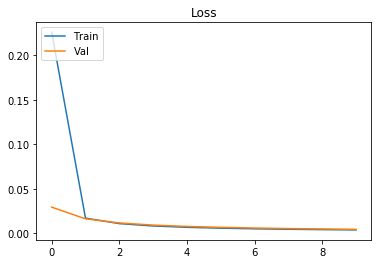

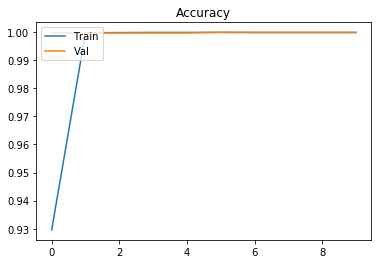

In [14]:
#graphe de perte et de precision
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
#predction dans 2,2 (vert) et -2,-2 (rouge)
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.3411304e-04 9.9936587e-01]
 [9.9958867e-01 4.1130153e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

#passer les point qui sont plus evident (origine)
datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5539298  0.44607022]
 [0.2240106  0.77598935]
 [0.06288771 0.9371122 ]]


['darkred', 'chartreuse', 'chartreuse']

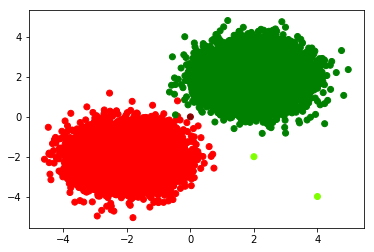

In [17]:
#lorigine est dark read, les autres 2 sont vert claire
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
# prenne 2 points
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 636us/sample - loss: 5.2289e-04 - acc: 1.0000
Test Loss 0.0005228877998888493
Test Accuracy 1.0


In [19]:
datas_test = []
labels_test = []
nbr_points = 20000

#creer 10000 abscisses et ordonnes avec moyenne -2 et ecart type 0,75
abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
#les 10000 labels reçoit 0 ou 1
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

#faire une seule liste: liste intermediaire .ravel
abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels_test = list([labels1,labels2])
labels_test = np.array(labels).ravel()
datas_test = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
labels_test, datas_test


(array([0., 0., 0., ..., 1., 1., 1.]), array([[-2.75664034, -1.03719944],
        [-1.36173189, -4.11830876],
        [-0.87968382, -2.08811867],
        ...,
        [-0.22359609,  2.64302065],
        [ 0.9645485 ,  0.11736351],
        [ 1.33815585,  1.31003855]]))

[[9.9967527e-01 3.2469205e-04]
 [9.9993193e-01 6.8084679e-05]
 [9.9550003e-01 4.4999323e-03]
 ...
 [3.4818515e-02 9.6518153e-01]
 [1.0503788e-01 8.9496213e-01]
 [8.0699883e-03 9.9193001e-01]]


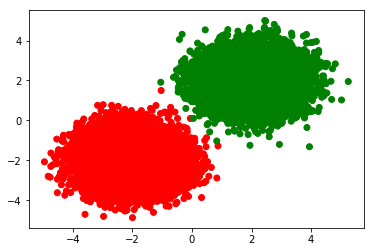

In [20]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [21]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

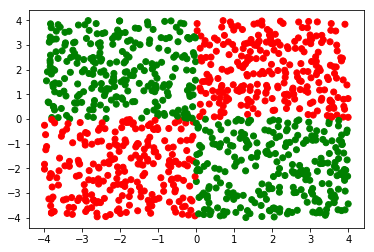

In [22]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [23]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [24]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [25]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[2.05022868 2.79789259]]
[[0.00197947 0.9980205 ]]
Found :  green
Should be :  red


## Résumé du modèle (couches de neurones)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [28]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 294us/sample - loss: 1.3677 - acc: 0.5462 - val_loss: 1.1298 - val_acc: 0.5750
Epoch 2/10
800/800 [==============================] - 0s 87us/sample - loss: 0.9801 - acc: 0.5775 - val_loss: 0.8519 - val_acc: 0.6050
Epoch 3/10
800/800 [==============================] - 0s 124us/sample - loss: 0.7782 - acc: 0.6025 - val_loss: 0.7108 - val_acc: 0.6050
Epoch 4/10
800/800 [==============================] - 0s 130us/sample - loss: 0.6734 - acc: 0.6250 - val_loss: 0.6344 - val_acc: 0.6350
Epoch 5/10
800/800 [==============================] - 0s 108us/sample - loss: 0.6141 - acc: 0.6700 - val_loss: 0.5875 - val_acc: 0.7300
Epoch 6/10
800/800 [==============================] - 0s 123us/sample - loss: 0.5757 - acc: 0.7763 - val_loss: 0.5540 - val_acc: 0.8150
Epoch 7/10
800/800 [==============================] - 0s 110us/sample - loss: 0.5474 - acc: 0.8200 - val_loss: 0.5281 - val_acc: 0.8300
Epo

## Le modèle est-il bien entraîné ?

In [29]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [30]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 73us/sample - loss: 0.4968 - acc: 0.8430
Test Loss 0.4968013620376587
Test Accuracy 0.843


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

In [ ]:
#changer le nb de données à 10000
# si tem menos donnees mudar epocs por ex 1000 donnees et epochs 100

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [3]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

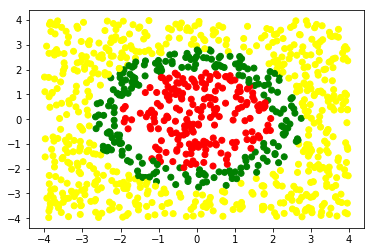

In [4]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [5]:
# model creation
#keras reseaux de neurones
#sequential parce que une sequence
model = tf.keras.models.Sequential()

In [6]:
# Add the layers
# ajouter une couche de neurones(soit vert soit rouge)
# couche de sortie indice du max softmax
model.add(tf.keras.layers.Dense(3, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

In [7]:
# output example
#chercher dans le dataset prendre la premiere valeur
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.05706153 0.34989387 0.5930446 ]]
Found :  2
Should be :  2


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(
    #verifier le loss, diminuer cette fonction d'erreur
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent #equivalent à derive, pour trouver min de loss
    metrics=["accuracy"]                           # accuracy
)

#la reseau de neurones va changer/bouger jusqu'on a la min loss

In [10]:
labels

[2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 0,


In [14]:
#jeu de validation 0,2, 20% de donnees vont servir a tester et valider
#20000 donnees alors moins 0,2 16000
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 113us/sample - loss: 0.9431 - acc: 0.6050 - val_loss: 1.0150 - val_acc: 0.5400
Epoch 2/10
800/800 [==============================] - 0s 116us/sample - loss: 0.9431 - acc: 0.6050 - val_loss: 1.0150 - val_acc: 0.5400
Epoch 3/10
800/800 [==============================] - 0s 112us/sample - loss: 0.9432 - acc: 0.6050 - val_loss: 1.0152 - val_acc: 0.5400
Epoch 4/10
800/800 [==============================] - 0s 45us/sample - loss: 0.9433 - acc: 0.6050 - val_loss: 1.0151 - val_acc: 0.5400
Epoch 5/10
800/800 [==============================] - 0s 52us/sample - loss: 0.9430 - acc: 0.6050 - val_loss: 1.0151 - val_acc: 0.5400
Epoch 6/10
800/800 [==============================] - 0s 102us/sample - loss: 0.9431 - acc: 0.6050 - val_loss: 1.0152 - val_acc: 0.5400
Epoch 7/10
800/800 [==============================] - 0s 123us/sample - loss: 0.9431 - acc: 0.6050 - val_loss: 1.0151 - val_acc: 0.5400
Epoc

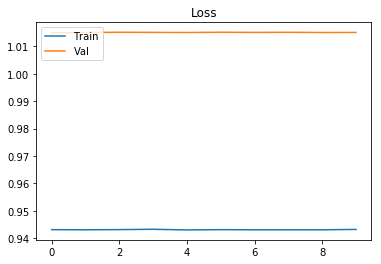

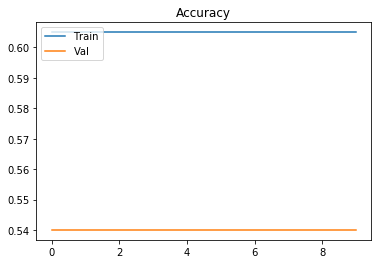

In [15]:
#graphe de perte et de precision
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()